In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [158]:
#importing the training file
df = pd.read_csv("M_train.csv")
pd.set_option('display.max_columns', None) # displays maximum columns
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Exploratory Data Analysis

In [159]:
df.columns #columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [160]:
df.isnull().sum() # Checking for null values

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There are no null values

In [161]:
df['id'].nunique() #checking Unique values for 'id'

159571

We can see that there are 159571 unique values in the 'id' Column which is same as number of rows. Therefore we can drop it.

In [162]:
df.drop('id',axis=1,inplace=True)

In [163]:
df.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


Eliminating the rows where the comments fall under no catagory

In [164]:
df_filter = df[~df.malignant.eq(0) & ~df.highly_malignant.eq(0) | ~df.highly_malignant.eq(0) | ~df.rude.eq(0) | ~df.threat.eq(0) | ~df.abuse.eq(0) | ~df.loathe.eq(0) ]

In [165]:
df_filter.reset_index(inplace=True, drop=True)

In [166]:
df_filter

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
1,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
2,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
3,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
4,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...
10554,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
10555,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
10556,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
10557,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.131171  0.185399  0.021120  0.123939   
highly_malignant   0.131171          1.000000  0.159211  0.050624  0.110047   
rude               0.185399          0.159211  1.000000 -0.092827 -0.080494   
threat             0.021120          0.050624 -0.092827  1.000000 -0.051894   
abuse              0.123939          0.110047 -0.080494 -0.051894  1.000000   
loathe             0.020534          0.078463 -0.064321  0.046135  0.071662   

                    loathe  
malignant         0.020534  
highly_malignant  0.078463  
rude             -0.064321  
threat            0.046135  
abuse             0.071662  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


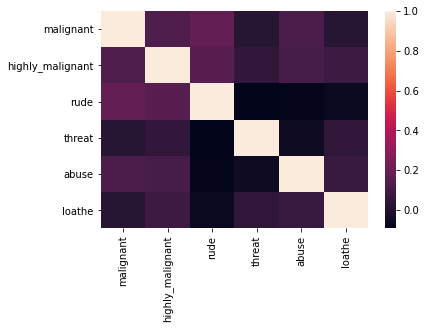

In [170]:
#Checking Correlation
print(df_filter.corr())
print(sns.heatmap(df_filter.corr())) 

We can see that the correlation is not high between independent variables

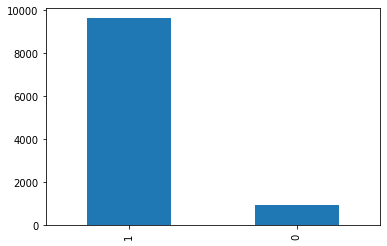

In [171]:
df_filter['malignant'].value_counts().plot.bar()
plt.show()

we can see that maximum of the comments fall under malignant

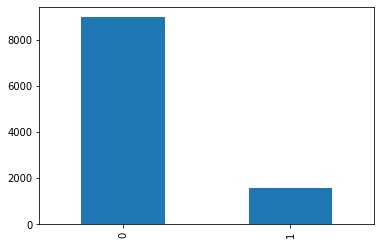

In [172]:
df_filter['highly_malignant'].value_counts().plot.bar()
plt.show()

We can see that there are less no of highly_malignant comments

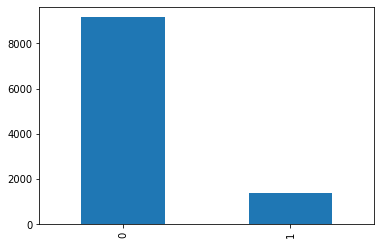

In [173]:
df_filter['loathe'].value_counts().plot.bar()
plt.show()

We can see that there are less no of loathe comments

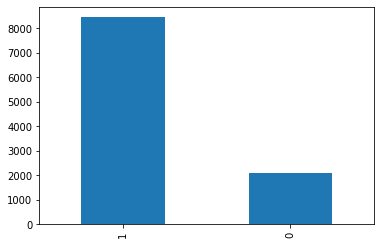

In [174]:
df_filter['rude'].value_counts().plot.bar()
plt.show()

We can see that there are more no of rude comments 

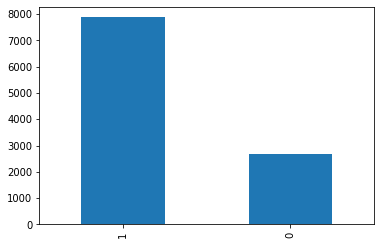

In [175]:
df_filter['abuse'].value_counts().plot.bar()
plt.show()

We can see that there are more no of abusive comments

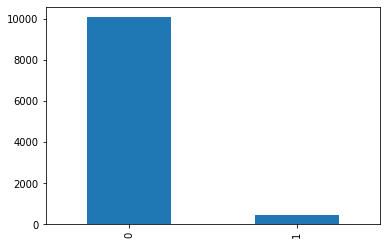

In [176]:
df_filter['threat'].value_counts().plot.bar()
plt.show()

We can see that there are very few threat comments

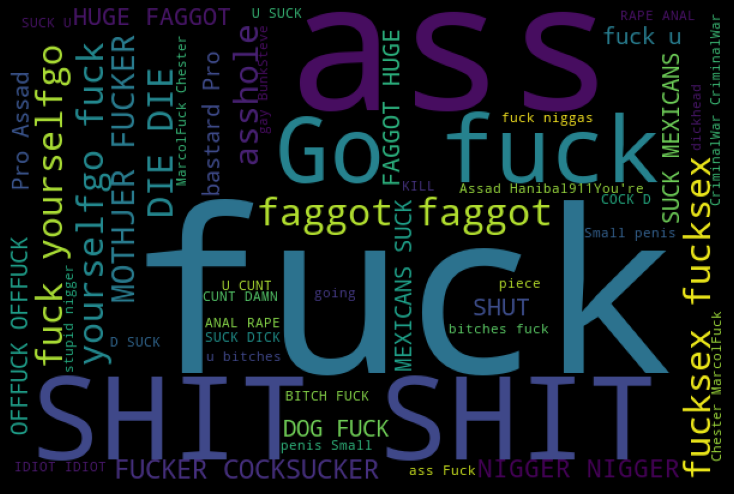

In [177]:
#Getting sense of words which are highly_malignant
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

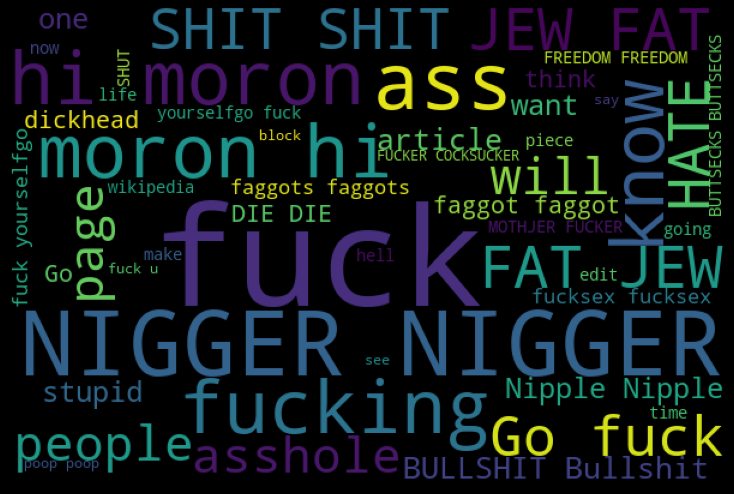

In [178]:
#Getting sense of words which are malignant
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

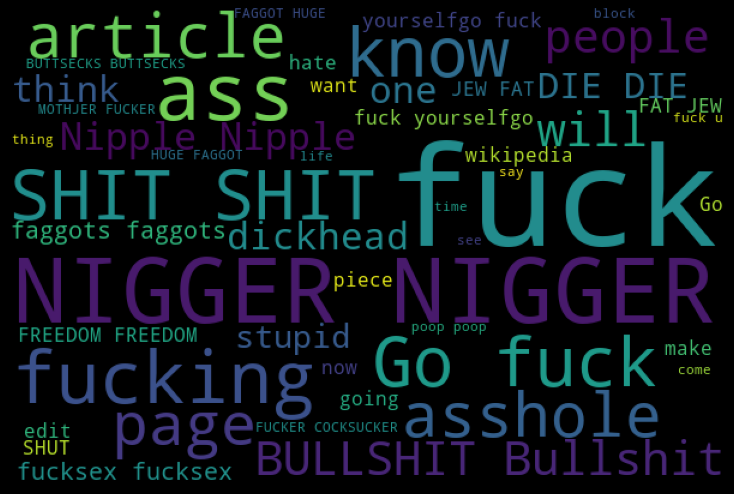

In [179]:
#Getting sense of words which are rude
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

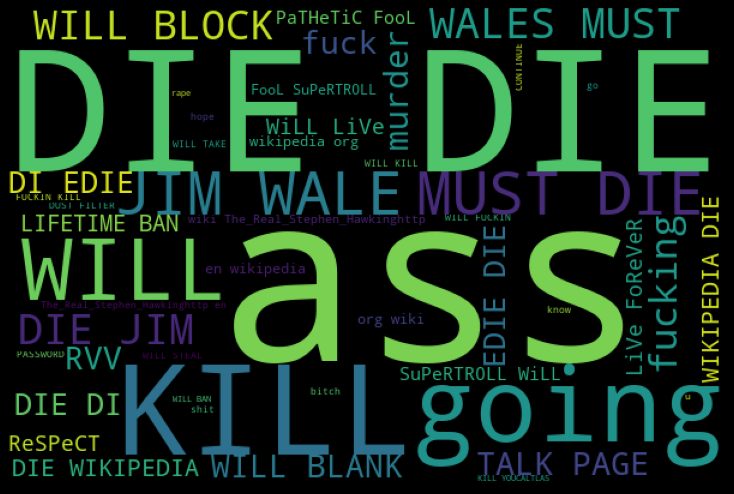

In [180]:
#Getting sense of words which are threat
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

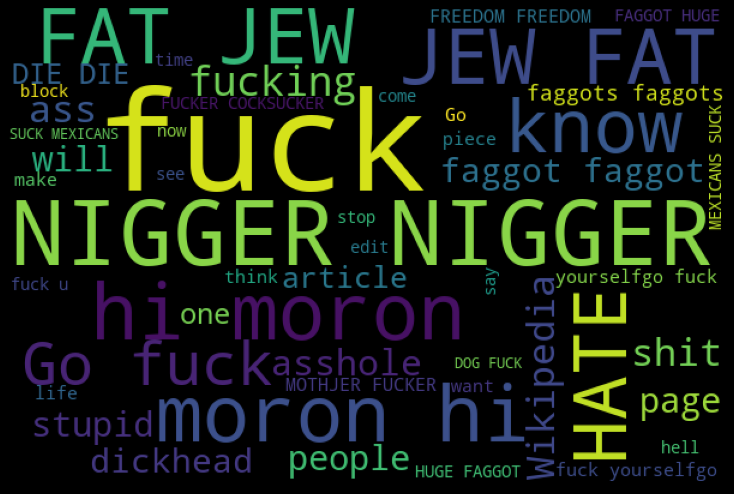

In [181]:
#Getting sense of words which are abuse
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

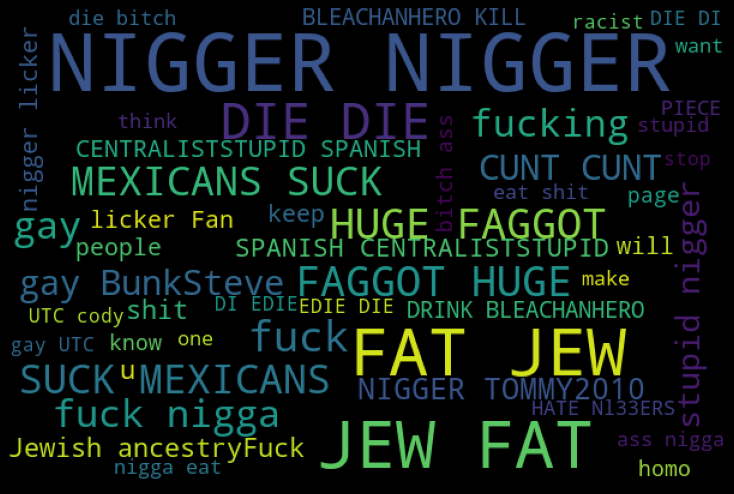

In [182]:
#Getting sense of words which are loathe
from wordcloud import WordCloud
mal = df_filter['comment_text'][df_filter['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

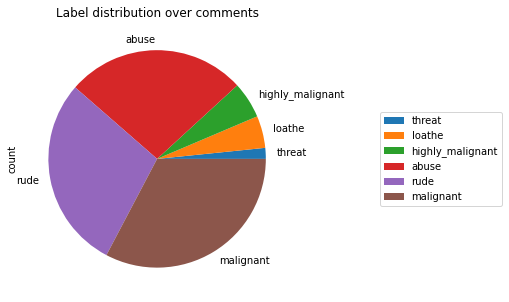

In [183]:
columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_filter[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

We an see here that maximum of the comments are malignant, rude and abusive. The threat kind of comments are the least

# Data Preprocessing

In [184]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n","", text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [185]:
df_filter['comment_text'] = df_filter['comment_text'].map(lambda text: clean_text(text))

In [186]:
re

<module 're' from 'C:\\Users\\allen\\anaconda3\\lib\\re.py'>

In [214]:
df_predict = pd.read_csv("M_test.csv")
#importing the test set
pd.set_option('display.max_columns', None) # displays maximum columns
df_predict

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [215]:
df_predict.isnull().sum() #checking null values

id              0
comment_text    0
dtype: int64

There are no null values

Cleaning the test data set

In [188]:
df_predict['comment_text'] = df_predict['comment_text'].map(lambda text: clean_text(text))

In [189]:
#After preprocessing
df_filter

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,cocksucker before you piss around on my work,1,1,1,0,1,0
1,you are gay or antisemmitian archangel white t...,1,0,1,0,1,1
2,fuck your filthy mother in the ass dry,1,0,1,0,1,0
3,get fucked up get fuckeeed up got a drink tha...,1,0,1,0,0,0
4,stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...
10554,our previous conversation you fucking shit ea...,1,0,1,0,1,1
10555,you are a mischievious pubic hair,1,0,0,0,1,0
10556,your absurd edits your absurd edits on great w...,1,0,1,0,1,0
10557,hey listen dont you ever delete my edits ever ...,1,0,0,0,1,0


In [193]:
categories= ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

Importing necessary libraries and Machine learning Algorithms

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Splitting data 

In [195]:
train, test = train_test_split(df_filter, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(7074,)
(3485,)


# Modeling

In [196]:
predict_data_nb_pipe = df_predict

In [197]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [198]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    predict_data_nb_pipe['prediction' + category] = NB_pipeline.predict(df_predict.comment_text)

... Processing malignant
Test accuracy is 0.9078909612625538
... Processing highly_malignant
Test accuracy is 0.8473457675753228
... Processing rude
Test accuracy is 0.7965566714490674
... Processing threat
Test accuracy is 0.9549497847919656
... Processing abuse
Test accuracy is 0.7472022955523673
... Processing loathe
Test accuracy is 0.8659971305595409


In [199]:
predict_data_nb_pipe.head() 
#predicted data by using MultinomialNB

,id,comment_text,predictionmalignant,predictionhighly_malignant,predictionrude,predictionthreat,predictionabuse,predictionloathe
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,1,0,1,0,1,0
1,0000247867823ef7,from rfc the title is fine as it is imo,1,0,1,0,1,0
2,00013b17ad220c46,sources zawe ashton on lapland,1,0,1,0,1,0
3,00017563c3f7919a,if you have a look back at the source the info...,1,0,1,0,1,0
4,00017695ad8997eb,i dont anonymously edit articles at all,1,0,1,0,1,0


In [200]:
predict_data_nb_pipe.to_csv("predict_data_nb_pipe.csv")
#saving the data 

In [201]:
predict_data_svc_pipe = df_predict

In [202]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    predict_data_svc_pipe['prediction' + category] = SVC_pipeline.predict(df_predict.comment_text)

... Processing malignant
Test accuracy is 0.9030129124820659
... Processing highly_malignant
Test accuracy is 0.8450502152080345
... Processing rude
Test accuracy is 0.8332855093256815
... Processing threat
Test accuracy is 0.9624103299856528
... Processing abuse
Test accuracy is 0.7523672883787661
... Processing loathe
Test accuracy is 0.9024390243902439


In [203]:
predict_data_svc_pipe.head()
#predicted data by using LinearSVC

,id,comment_text,predictionmalignant,predictionhighly_malignant,predictionrude,predictionthreat,predictionabuse,predictionloathe
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,1,0,1,0,1,0
1,0000247867823ef7,from rfc the title is fine as it is imo,1,0,0,0,0,0
2,00013b17ad220c46,sources zawe ashton on lapland,1,0,0,0,1,0
3,00017563c3f7919a,if you have a look back at the source the info...,1,0,1,0,1,0
4,00017695ad8997eb,i dont anonymously edit articles at all,1,0,1,0,1,0


In [204]:
predict_data_svc_pipe.to_csv("predict_data_svc_pipe.csv")
#Saving the Data

In [205]:
predict_data_log_pipe=df_predict

In [206]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    predict_data_log_pipe['prediction' + category] = LogReg_pipeline.predict(df_predict.comment_text)

... Processing malignant
Test accuracy is 0.9081779053084649
... Processing highly_malignant
Test accuracy is 0.8582496413199426
... Processing rude
Test accuracy is 0.8143472022955524
... Processing threat
Test accuracy is 0.9581061692969871
... Processing abuse
Test accuracy is 0.757819225251076
... Processing loathe
Test accuracy is 0.8860832137733142


In [207]:
predict_data_log_pipe.head()
#predicted data by using LogisticRegression

,id,comment_text,predictionmalignant,predictionhighly_malignant,predictionrude,predictionthreat,predictionabuse,predictionloathe
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,1,0,1,0,1,0
1,0000247867823ef7,from rfc the title is fine as it is imo,1,0,1,0,1,0
2,00013b17ad220c46,sources zawe ashton on lapland,1,0,1,0,1,0
3,00017563c3f7919a,if you have a look back at the source the info...,1,0,1,0,1,0
4,00017695ad8997eb,i dont anonymously edit articles at all,1,0,1,0,1,0


In [208]:
predict_data_log_pipe.to_csv("predict_data_log_pipe.csv")
#Saving the data

After averaging the accuracy score for all the models we can see that SVC has the highest average. Therefore SVC is the best model.

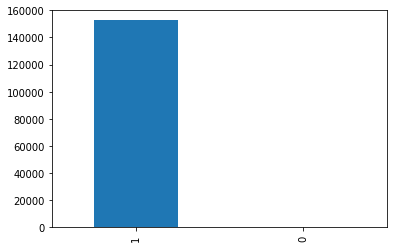

In [231]:
predict_data_svc_pipe['predictionmalignant'].value_counts().plot.bar()
plt.show()

We can see that maximum of the comments are malignant

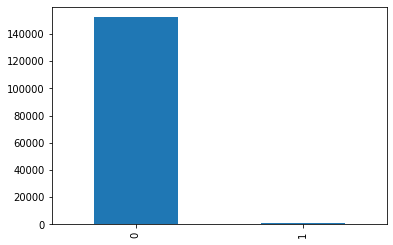

In [232]:
predict_data_svc_pipe['predictionhighly_malignant'].value_counts().plot.bar()
plt.show()

We can see that there are less no of highly_malignant comments

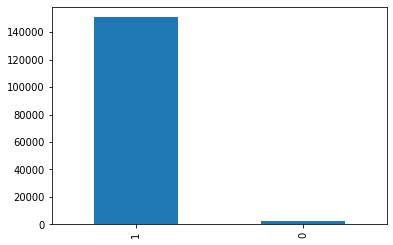

In [233]:
predict_data_svc_pipe['predictionrude'].value_counts().plot.bar()
plt.show()

We can see that there are more no of rude comments

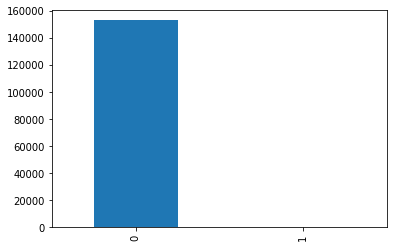

In [234]:
predict_data_svc_pipe['predictionthreat'].value_counts().plot.bar()
plt.show()

We can see that there are very few threat comments

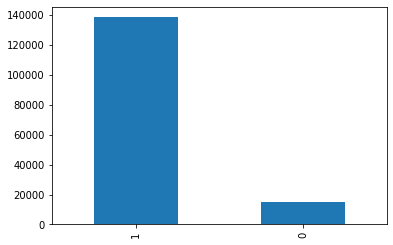

In [235]:
predict_data_svc_pipe['predictionabuse'].value_counts().plot.bar()
plt.show()

We can see that there are more no of abusive comments

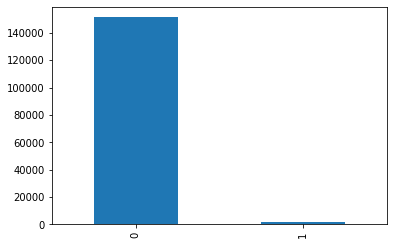

In [236]:
predict_data_svc_pipe['predictionloathe'].value_counts().plot.bar()
plt.show()

We can see that there are less no of loathe comments

In [237]:
predict_data_svc_pipe.columns

Index(['id', 'comment_text', 'predictionmalignant',
       'predictionhighly_malignant', 'predictionrude', 'predictionthreat',
       'predictionabuse', 'predictionloathe'],
      dtype='object')

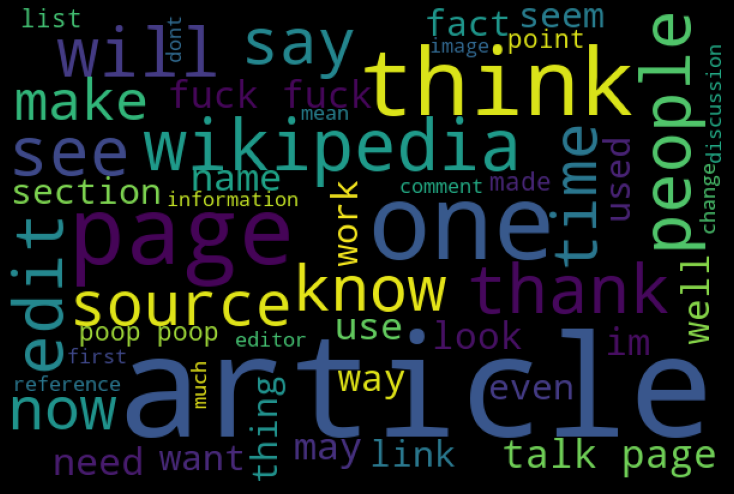

In [245]:
#Getting sense of words which are malignant
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionmalignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

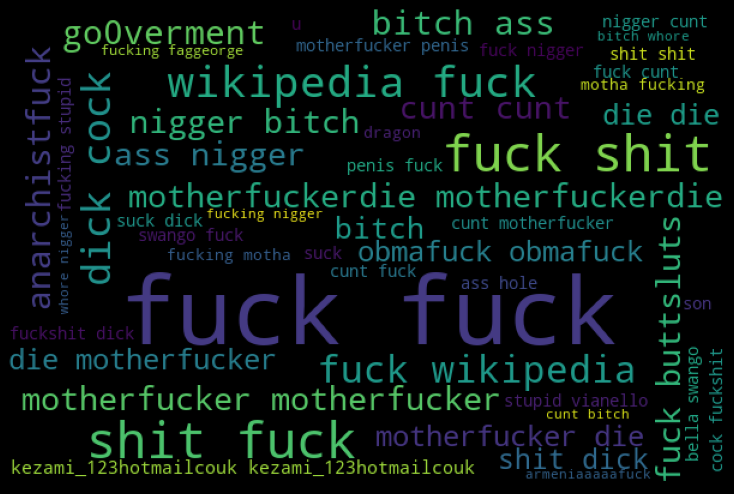

In [246]:
#Getting sense of words which are highly_malignant
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionhighly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

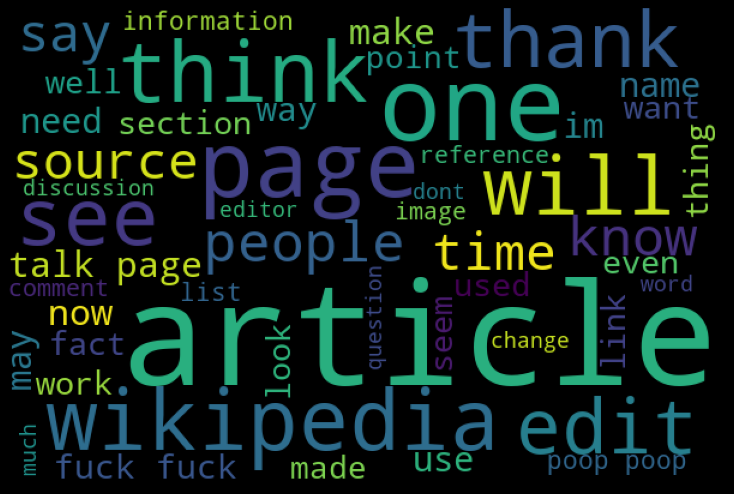

In [247]:
#Getting sense of words which are rude
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionrude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

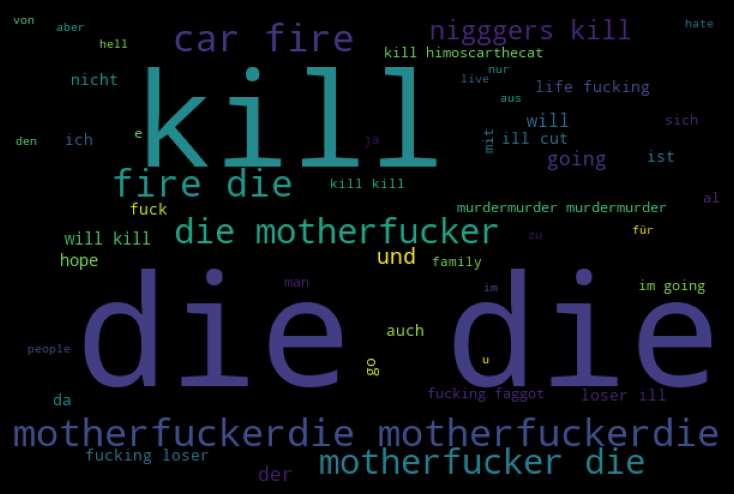

In [248]:
#Getting sense of words which are threat
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionthreat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

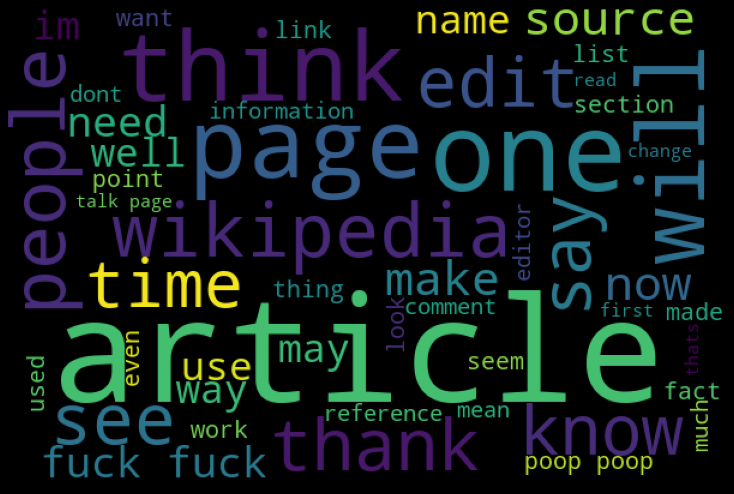

In [249]:
#Getting sense of words which are abuse
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionabuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

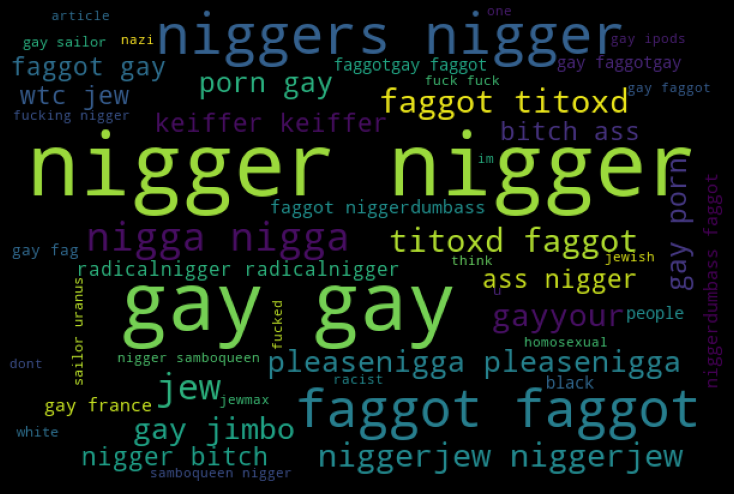

In [250]:
#Getting sense of words which are loathe
from wordcloud import WordCloud
mal = predict_data_svc_pipe['comment_text'][predict_data_svc_pipe['predictionloathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

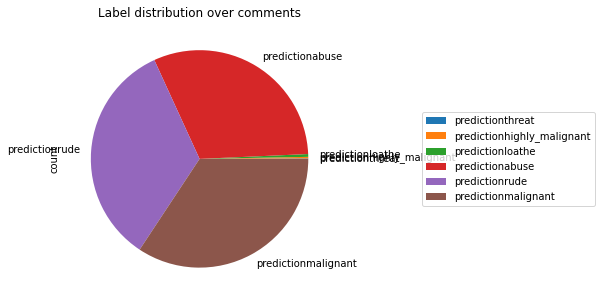

In [244]:
columns = ['predictionmalignant',
       'predictionhighly_malignant', 'predictionrude', 'predictionthreat',
       'predictionabuse', 'predictionloathe']
df_distribution = predict_data_svc_pipe[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

We an see here that maximum of the comments are malignant, rude and abusive. The threat kind of comments are the least